In [ ]:
!pip install pdpbox
!pip install eli5
!pip install alibi
!pip install lazypredict
!pip install scikitlearn

     |████████████████████████████████| 34.0 MB 40 kB/s 
     |████████████████████████████████| 13.1 MB 6.6 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=f147ba5df0460d92aac562f9527fca71ec0db39fd4d3fc7cbc53bf7305d8987a
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 106 kB 29.0 MB/s 
     |████████████████████████████████| 327 kB 29.2 MB/s 
     |████████████████████████████████| 2.6 MB 36.6 MB/s 
     |████████████████████████████████| 28.0 MB 50 kB/s 
     |████████████████████████████████| 636 kB 44.0 MB/s 
     |████████████████████████████████| 895 kB 36.6 MB/s 
     |████████████████████████████████| 3.3 MB 39.6 MB/s 
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052158 sha256=26b6f9e1cc33762d1090df46ac155ce0b47f6df7868b24fda2bf2fc48d29ba01
  Stored in directory: /root/.cache/pip/wheels/b6/09/83/36dd0224ce32dcdf5e218b36362235ca2e50cece60a966ae1b
Successfully built spacy-lookups-data
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 6.8 MB 27.8 MB/s 
     |████████████████████████████████| 269 kB 54.8 MB/s 
    

ERROR: Could not find a version that satisfies the requirement scikitlearn (from versions: none)
ERROR: No matching distribution found for scikitlearn


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Work/research/xai for healthcare/datasets/diabetes1.csv')
df.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0




---

# **Training Model : XGBoostClassifier**

In [ ]:
import tensorflow as tf
tf.get_logger().setLevel(40) # suppress deprecation messages
tf.compat.v1.disable_v2_behavior() # disable TF2 behaviour as alibi code still relies on TF1 constructs
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly()) # False

TF version:  2.5.0
Eager execution enabled:  False


In [ ]:
feature_names=['Gender','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
data = df[feature_names]
target = df.CLASS

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data,target, random_state=0)

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 15.79it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,1.00,1.00,None,1.00,0.05
DecisionTreeClassifier,0.99,1.00,None,0.99,0.02
AdaBoostClassifier,0.96,0.98,None,0.96,0.13
LGBMClassifier,0.99,0.97,None,0.99,0.22
GaussianNB,0.96,0.95,None,0.96,0.02
XGBClassifier,0.99,0.95,None,0.99,0.26
LabelPropagation,0.96,0.94,None,0.97,0.06
LabelSpreading,0.96,0.94,None,0.97,0.07
RandomForestClassifier,0.98,0.93,None,0.98,0.20


In [ ]:
from xgboost import XGBClassifier

In [ ]:
algo = XGBClassifier()
algo.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from xgboost import XGBClassifier, plot_importance
import warnings
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, get_dataset, info_plots
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
print('top 2 important features:')
imp_index = np.argsort(algo.feature_importances_)
print(feature_names[imp_index[-1]])
print(feature_names[imp_index[-2]])

top 2 important features:
HbA1c
BMI




---

# **Partial Dependency Plot**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


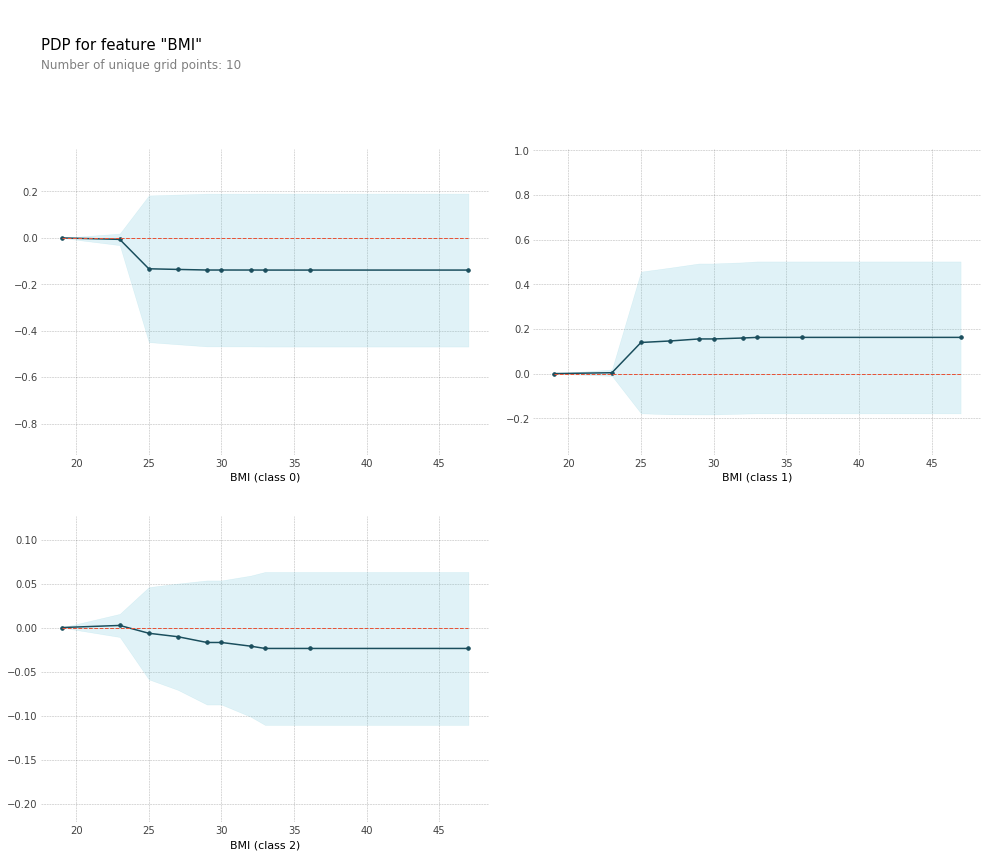

In [ ]:
plot_pdp(algo, x_train, 'BMI')

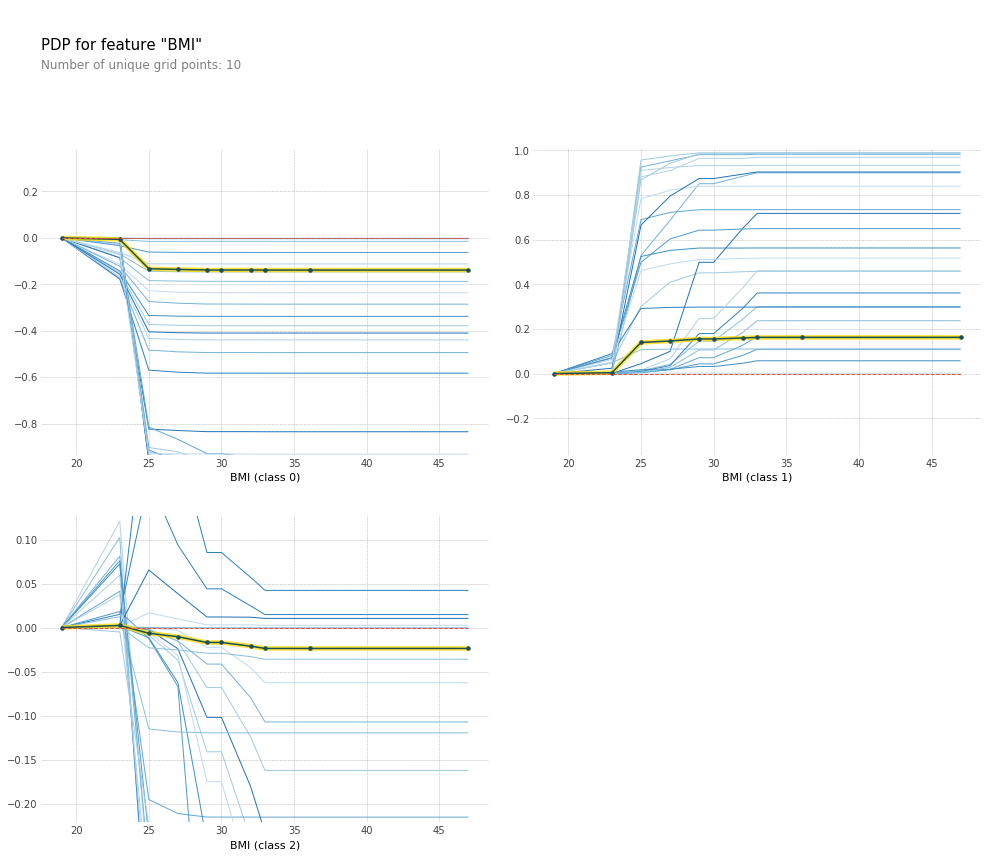

In [ ]:
plot_pdp(algo, x_train, 'BMI', cluster_flag=True, nb_clusters=24, lines_flag=True)

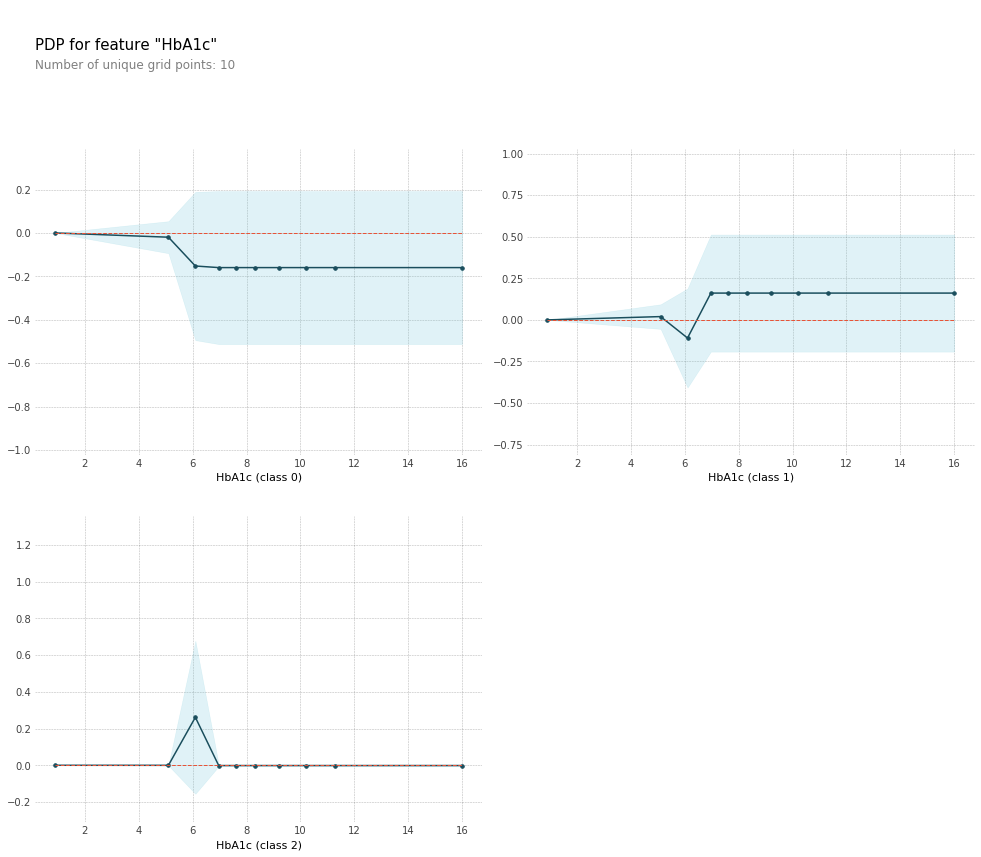

In [ ]:
plot_pdp(algo, x_train, 'HbA1c')



---

# **Partial Dependency Plot Interact**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


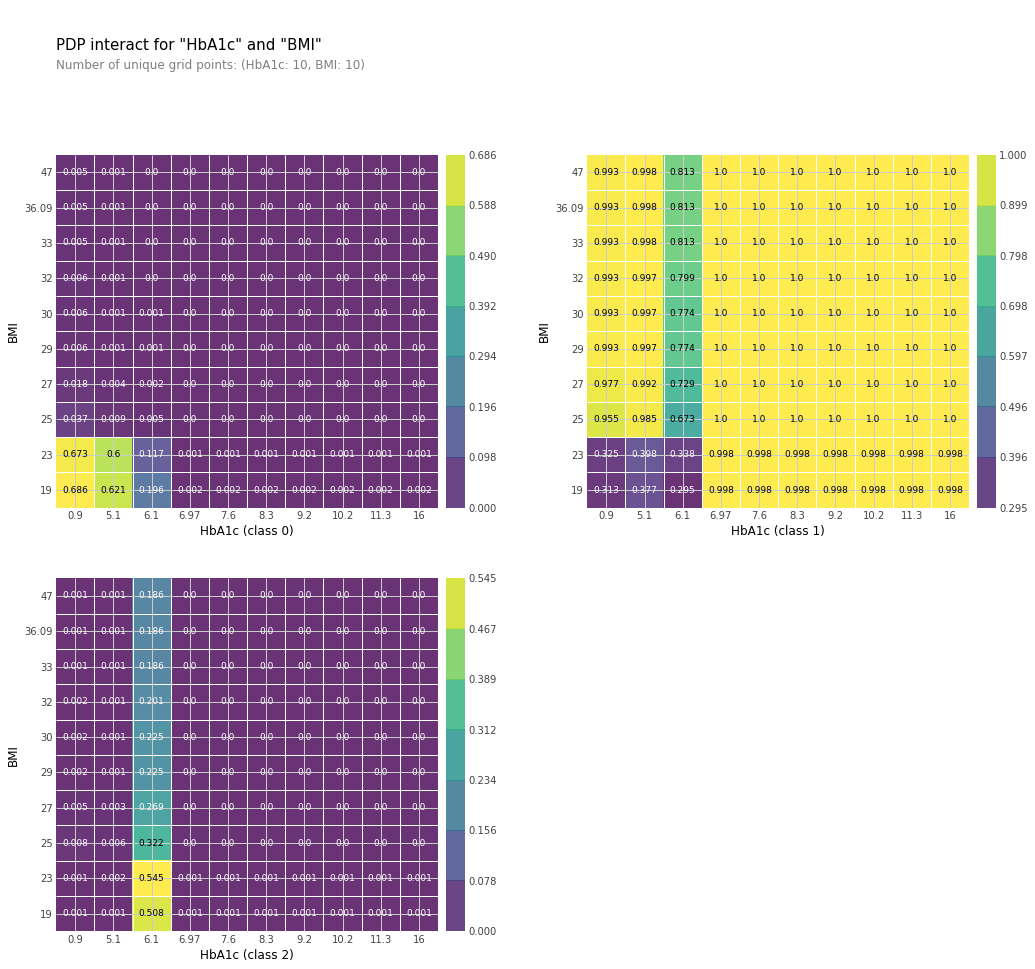

In [ ]:
features_to_plot = ['HbA1c', 'BMI']
inter1  =  pdp.pdp_interact(model=algo, dataset=x_train, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')
plt.show()



---

# **Individual Conditional Expectation**

ICE : https://github.com/Dylanlee777/5-Min-Machine-Learning/blob/master/10%20ICE.ipynb 

In [ ]:
import sklearn.ensemble as ske
model= ske.RandomForestClassifier(n_estimators=50)
lrmodel=model.fit(x_train, y_train)

In [ ]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import PuOr
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing

In [ ]:
!pip install pycebox

  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3640 sha256=73381d11c0024fff96d6b47aa2a718c9cae9c6c04f5b0acee99323b9c0ddeced
  Stored in directory: /root/.cache/pip/wheels/cc/0d/0a/06236a41d8f5c3485c1057262de55329e227a0c239fd00d0cd
Successfully built pycebox


In [ ]:
from pycebox.ice import ice, ice_plot

In [ ]:
ice_df = ice(data = x_train, column = 'BMI', predict = lrmodel.predict, num_grid_points=10)

In [ ]:
ice_df.head

<bound method NDFrame.head of data_BMI  19.00                              ...  39.18  40.00  40.50  43.25  47.00
Gender     0.00                              ...   0.00   0.00   0.00   0.00   0.00
AGE       30.00         45.00  50.00  77.00  ...  55.00  40.00  38.00  55.00  38.00
Urea       4.80   6.00   4.30   4.80   5.00  ...   3.66   4.30   5.80   6.66   4.00
Cr       80.00  97.00  71.00  62.00  106.00  ... 67.00  72.00  59.00  73.00  67.00 
HbA1c     5.50   5.80   7.20   5.90   5.40   ...  7.00   7.00   6.70   10.90  10.20
Chol       5.50   4.20   5.60   5.30   0.00  ...   5.60   4.00   5.30   3.50   5.20
TG         1.80   1.70   2.00   1.30   2.80  ...   1.91   1.80   2.00   3.20   2.00
HDL        1.20   1.20   1.10   1.00   0.80  ...   1.30   0.90   1.60   0.90   1.10
LDL        3.50   2.20   3.00   3.70   1.80  ...   3.50   2.40   2.90   1.30   3.20
VLDL      0.80   0.80   1.00   0.60   0.70   ...  13.10  12.20  14.00  22.20  14.00
BMI                                          .

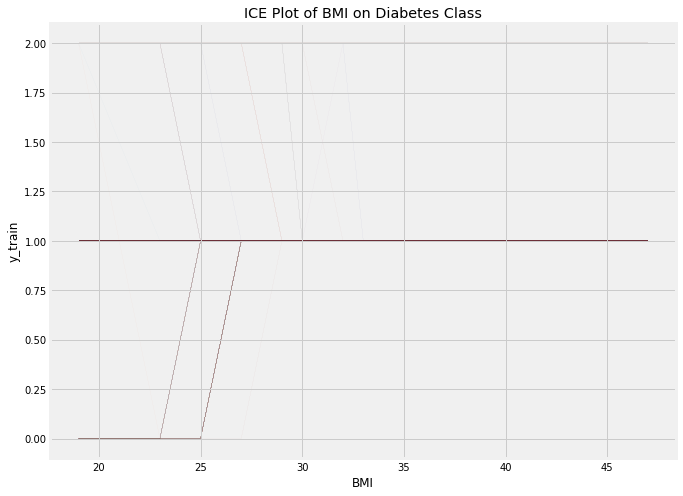

In [ ]:
plt.rcParams['figure.figsize'] = 10,8
ice_plot(ice_df, linewidth = .15, cmap=PuOr, alpha = 0.1)
plt.ylabel('y_train')
plt.xlabel('BMI')
plt.title('ICE Plot of BMI on Diabetes Class')
plt.show()

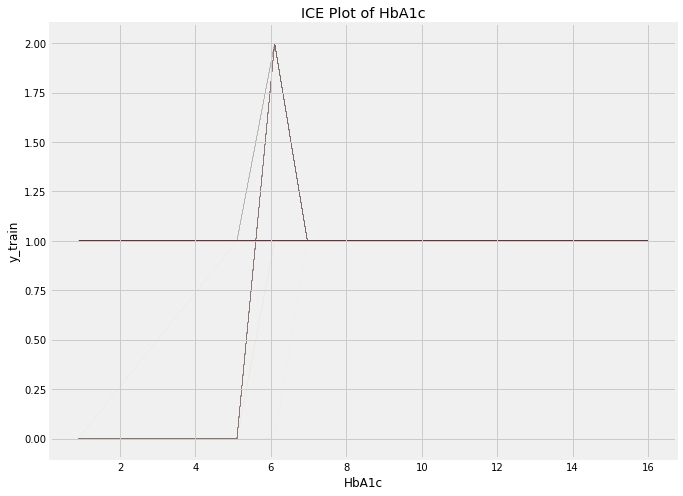

In [ ]:
ice_df = ice(data = x_train, column = 'HbA1c', predict = lrmodel.predict, num_grid_points=10)
plt.rcParams['figure.figsize'] = 10,8
ice_plot(ice_df, linewidth = .15, cmap=PuOr, alpha = 0.1)
plt.ylabel('y_train')
plt.xlabel('HbA1c')
plt.title('ICE Plot of HbA1c')
plt.show()